# Trabajo de Fin de Master
Sergio Marchena
UNAV - 2024

In [1]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json as json

In [39]:
api_key = 'hBcLlgDudeUuw0C3ALPbl66jWSIxeE/C/pw0uAhe2SGQtzr+1CP5fI1VMGxOCkQE'
url = "https://api.footprint.network/api/v1/native/async"

query = " select * from token_price_5min where token_symbol = 'RIF' limit 1 "

query2 = " select date(timestamp) as Date, avg(price) as Price, token_symbol as Symbol from token_price_5min where token_symbol in ('DOC','RIF') and chain = 'Rootstock' group by 1,3 order by 1 desc limit 180 "
query2 = query2 [1:-1]
query3 = " select * from protocol_transactions where chain = 'Ethereum' " 
query4  = " select * from ethereum_transactions " 

query2 = query4 [1:-1]
print(query2)

payload = { "query": query2}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "api-key": api_key
}

response = requests.post(url, json=payload, headers=headers).json()
ok = response['message']
print(response)
execution_id = response['data']['execution_id']

print(ok)
print(execution_id)


select * from ethereum_transactions
{'message': 'success', 'code': 0, 'data': {'state': 'INIT', 'execution_id': 'a62a33cd-ce09-4d5f-b679-77c023808ce7'}}
success
a62a33cd-ce09-4d5f-b679-77c023808ce7


In [41]:
url = 'https://api.footprint.network/api/v1/native/' + execution_id + '/results?limit=1000'

headers = {
    "accept": "application/json",
    "api-key": api_key
}

response = requests.get(url, headers=headers).json()

respuesta = response['data']['result']
print(response)

df = pd.DataFrame(respuesta)
df


{'message': 'success', 'code': 0, 'data': {'execution_id': 'a62a33cd-ce09-4d5f-b679-77c023808ce7', 'state': 'SUCCESS', 'submitted_at': '2024-05-27T21:08:59.000Z', 'expires_at': '2024-05-28T21:09:06.000Z', 'finished_at': '2024-05-27T21:09:06.000Z', 'total': '100000', 'error_message': None, 'result': [{'block_number': 19858549, 'hash': '0x579eb785cb8c2ab78cca75433c2056212c6ebe69a95290aecd5ed86c3450a899', 'nonce': 30, 'transaction_index': 79, 'from_address': '0xfc7953a3c8e073866fe95b57191ee779a936fc2f', 'to_address': '0xdac17f958d2ee523a2206206994597c13d831ec7', 'value': '0.000000000', 'gas': 51140, 'gas_price': 3922258185, 'input': '0xa9059cbb000000000000000000000000a289215003556e1a79e0dff12e153e237c7433fe00000000000000000000000000000000000000000000000000000002540be400', 'receipt_cumulative_gas_used': 5563003, 'receipt_gas_used': 46109, 'receipt_contract_address': None, 'receipt_root': None, 'receipt_status': 1, 'block_hash': '0xa6f30a1a48b807ba7c2a1a847c56cfa92a1acfd7adab696b1aff8e59950

,block_number,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,...,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,block_timestamp
0,19858549,0x579eb785cb8c2ab78cca75433c2056212c6ebe69a952...,30,79,0xfc7953a3c8e073866fe95b57191ee779a936fc2f,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000000,51140,3922258185,0xa9059cbb000000000000000000000000a28921500355...,...,46109,None,None,1,0xa6f30a1a48b807ba7c2a1a847c56cfa92a1acfd7adab...,4.538569e+09,9.000000e+07,2,3922258185,2024-05-13 03:55:47.000 UTC
1,17360133,0xed354757a6fd84e9de63ad5fec1ccc673dcf5fd17f0d...,5166,12,0x7885811c1bf44f43e68624bf15df8c0b5155dc4d,0xe471a17005d23ce402b61e08fb149948305cce27,0.000000000,1424013,28734790616,0x37563293,...,949342,None,None,1,0x70380b4aea7188811beb706be6accbffa7e7cc97e86d...,5.625345e+10,2.500000e+09,2,28734790616,2023-05-28 21:16:23.000 UTC
2,17359109,0x3889896d633545857d314eba971543830003e95ea483...,5146,44,0x7885811c1bf44f43e68624bf15df8c0b5155dc4d,0xea732e78612f7e1a4f2aed0d1b265fcfca3f0513,0.000000000,47261,32661893703,0x095ea7b30000000000000000000000006131b5fae19e...,...,47261,None,None,1,0x75ad3e3dfc174779d4c3c448ccedbb985e48543ddd1b...,6.556452e+10,2.500000e+09,2,32661893703,2023-05-28 17:49:59.000 UTC
3,17360551,0xc527cd783a9c36086ee2655a2ed948320bf8316ff0aa...,5169,197,0x7885811c1bf44f43e68624bf15df8c0b5155dc4d,0xee772cec929d8430b4fa7a01cd7fbd159a68aa83,0.000000000,46512,24718703195,0x095ea7b3000000000000000000000000000000000022...,...,46512,None,None,1,0xb4d02ad3004401ae1d21e413bb1c8b9e3eec92e7cb94...,3.310158e+10,1.000000e+08,2,24718703195,2023-05-28 22:40:47.000 UTC
4,17357947,0xc6a61f4688e8c1f6c6dd39c97b3c1bdac10547ae05bb...,5128,101,0x7885811c1bf44f43e68624bf15df8c0b5155dc4d,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,60000000000000000.000000000,234721,29830801854,0x3593564c000000000000000000000000000000000000...,...,182790,None,None,0,0xd0eebae76c01126f87478b7a7fcdcfade0ad7d4d5ef8...,4.677968e+10,3.000000e+08,2,29830801854,2023-05-28 13:55:35.000 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19857826,0x5b27c8a0b7ea60c960bcc54c76609c3d58b51286f9cb...,65605,1,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,0x6000da47483062a0d734ba3dc7576ce6a0b645c4,0.000000000,174262,38763755569,0x3f62192e000000000000000000000000000000000000...,...,134332,None,None,1,0xb25dcb2794088e429dbc7ef9586245e6a40fa5f808ce...,3.876376e+10,3.876376e+10,2,38763755569,2024-05-13 01:30:11.000 UTC
996,19858343,0x4a3ea4ff4435b70e45844bdeccbce678b47c6d8de543...,65621,66,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,0x6000da47483062a0d734ba3dc7576ce6a0b645c4,0.000000000,175402,6306105052,0x3f62192e000000000000000000000000000000000000...,...,140611,None,None,1,0xd58d7936ca7621cee932702efddb187f4570972d288e...,1.002232e+10,2.200000e+09,2,6306105052,2024-05-13 03:14:23.000 UTC
997,19858312,0xb56e2f8e9de36135abcca1cff39304267616be06be5e...,65619,62,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,0x6000da47483062a0d734ba3dc7576ce6a0b645c4,0.000000000,215593,7085252087,0x3f62192e000000000000000000000000000000000000...,...,173708,None,None,1,0x0d6975e64329ba08cfb5882251b271d996626bb718f2...,1.263755e+10,1.782000e+09,2,7085252087,2024-05-13 03:08:11.000 UTC
998,19857428,0x1eeda015738c5a86e6409e2641b138a9e438ade18ea2...,65592,49,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,0x6000da47483062a0d734ba3dc7576ce6a0b645c4,0.000000000,201764,4862663056,0x3f62192e000000000000000000000000000000000000...,...,162320,None,None,1,0xb116db90638ad8f2c1220395cf8c42ed1bb036dc02fd...,8.002459e+09,1.617000e+09,2,4862663056,2024-05-13 00:10:11.000 UTC


In [48]:
df[df['block_timestamp'] > '2024']['value']

0                        0.000000000
12       18000000000000000.000000000
13       39533710000000000.000000000
14     5000000000000000000.000000000
15                       0.000000000
                   ...              
995                      0.000000000
996                      0.000000000
997                      0.000000000
998                      0.000000000
999                      0.000000000
Name: value, Length: 989, dtype: object

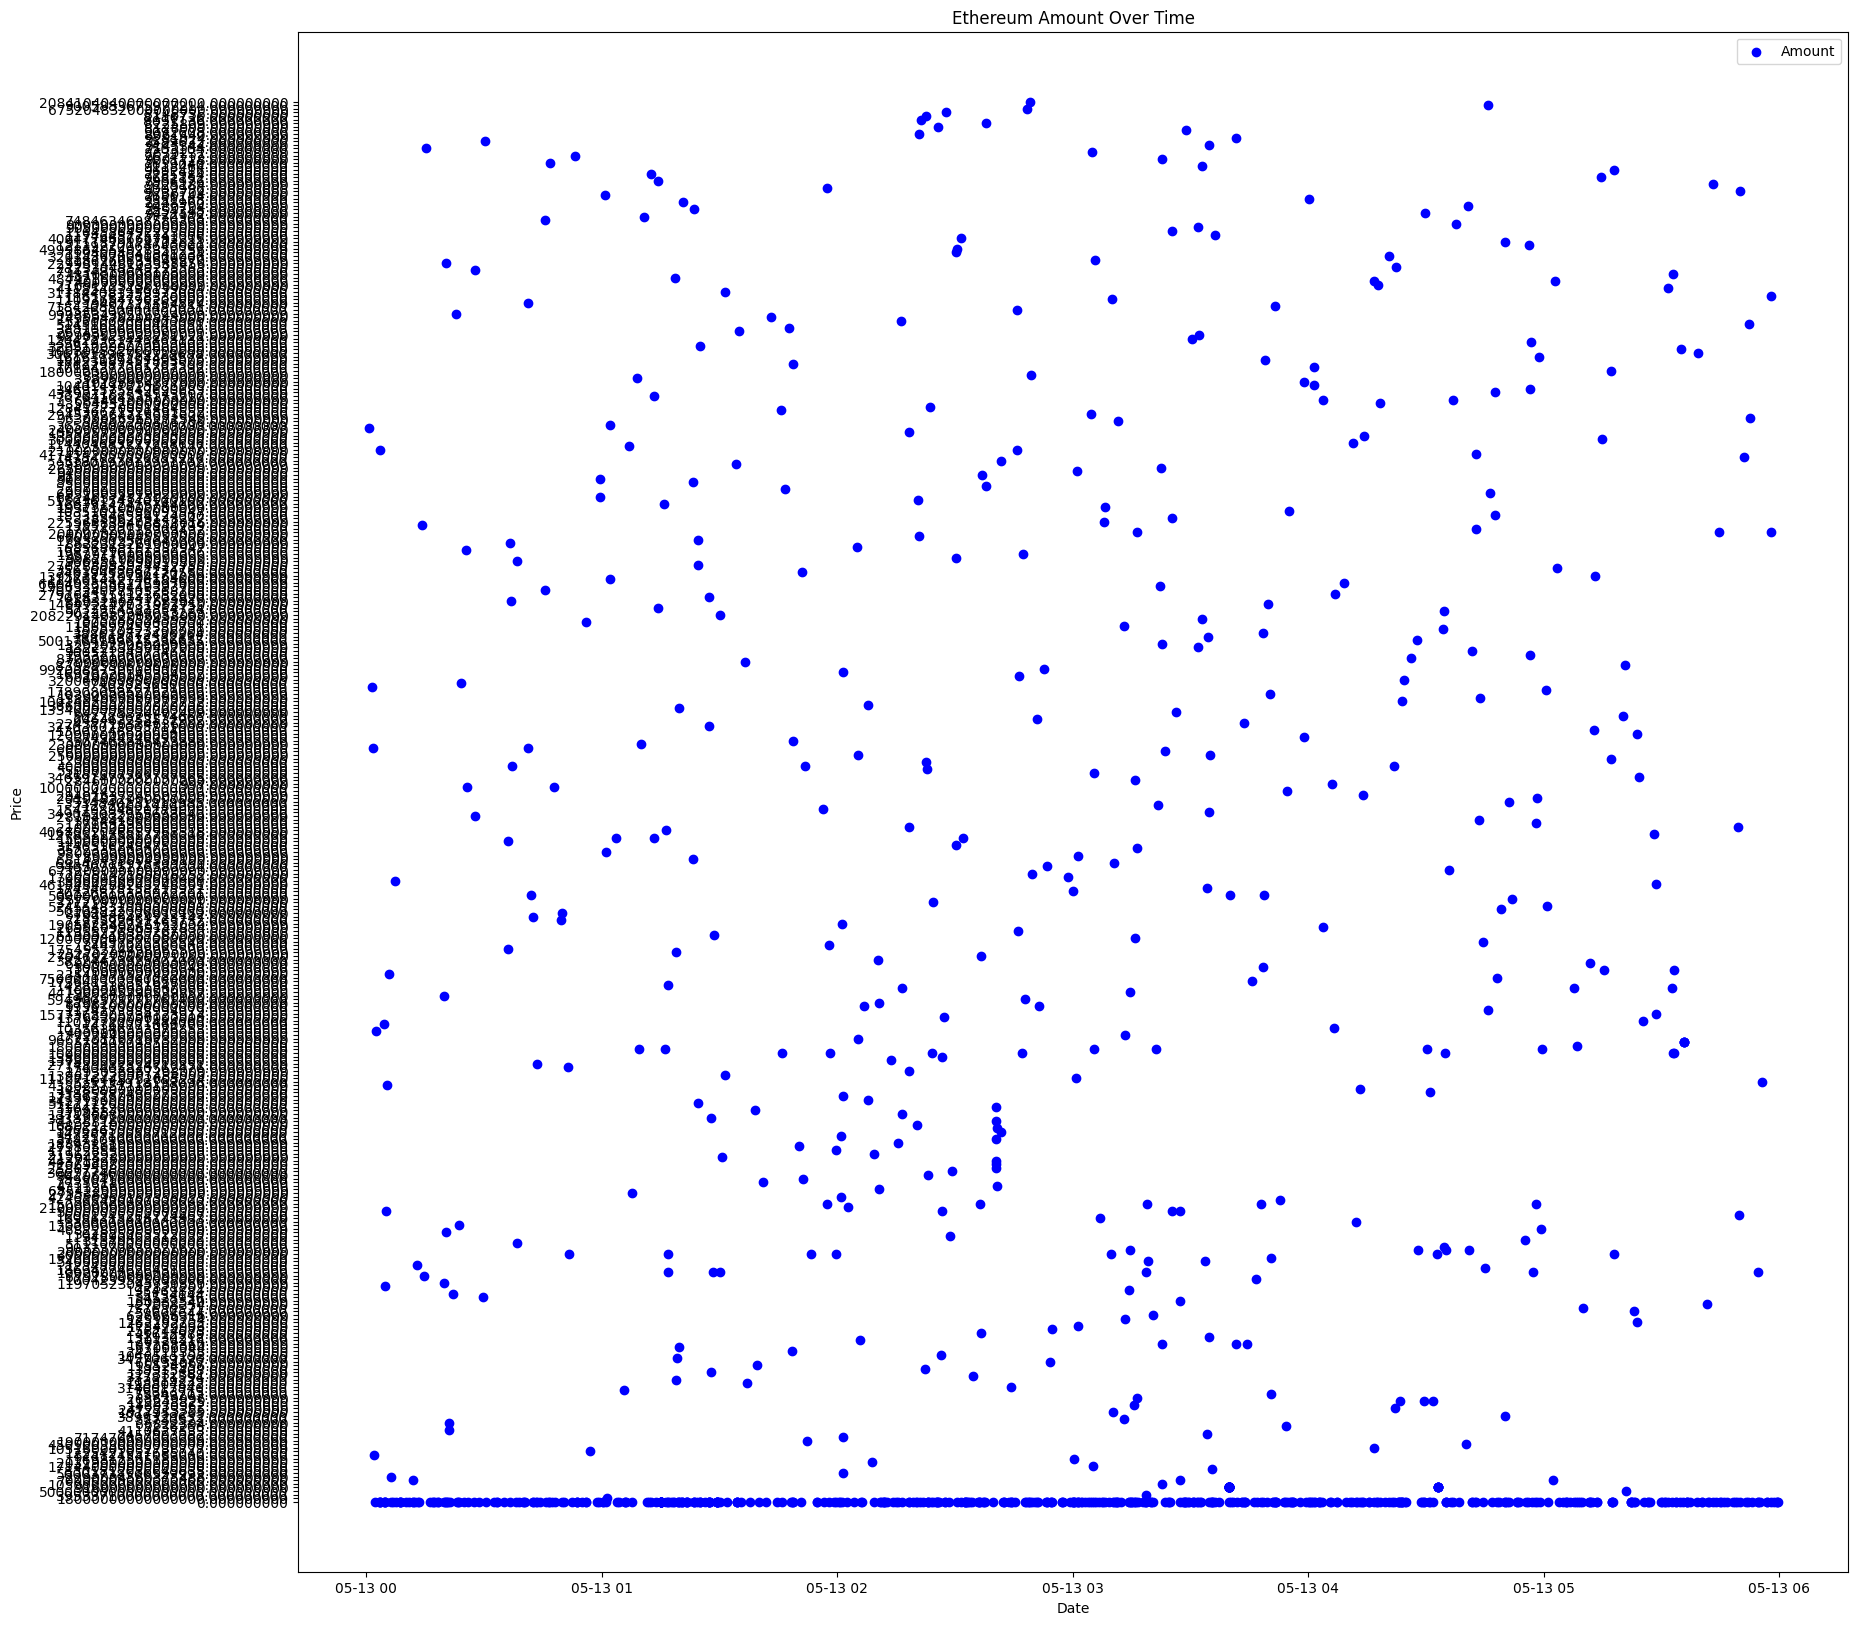

In [50]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

plt.figure(figsize=(20, 20))

plt.scatter(df[df['block_timestamp'] > '2024']['block_timestamp'], df[df['block_timestamp'] > '2024']['value'], label='Amount', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ethereum Amount Over Time')
plt.legend()

plt.show()